<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

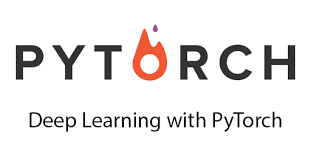

# 라이블러리 불러오기

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
torch.manual_seed(1)  ## 랜덤 고정 

# 데이터 불러오기

In [0]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# 모형설정

In [0]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)   # 입력 2, 출력 1
        self.sigmoid = nn.Sigmoid()     # 활성화 함수 

    def forward(self, x):
        return self.sigmoid(self.linear(x))

model = BinaryClassifier()

# 학습 실행

In [18]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # f(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))


Epoch    0/1000 Cost: 0.769800 Accuracy 33.33%
Epoch   10/1000 Cost: 0.416151 Accuracy 83.33%
Epoch   20/1000 Cost: 0.526553 Accuracy 83.33%
Epoch   30/1000 Cost: 0.420928 Accuracy 83.33%
Epoch   40/1000 Cost: 0.337506 Accuracy 83.33%
Epoch   50/1000 Cost: 0.261328 Accuracy 83.33%
Epoch   60/1000 Cost: 0.199783 Accuracy 83.33%
Epoch   70/1000 Cost: 0.163303 Accuracy 100.00%
Epoch   80/1000 Cost: 0.147157 Accuracy 100.00%
Epoch   90/1000 Cost: 0.136817 Accuracy 100.00%
Epoch  100/1000 Cost: 0.127992 Accuracy 100.00%
Epoch  110/1000 Cost: 0.120257 Accuracy 100.00%
Epoch  120/1000 Cost: 0.113420 Accuracy 100.00%
Epoch  130/1000 Cost: 0.107334 Accuracy 100.00%
Epoch  140/1000 Cost: 0.101882 Accuracy 100.00%
Epoch  150/1000 Cost: 0.096969 Accuracy 100.00%
Epoch  160/1000 Cost: 0.092519 Accuracy 100.00%
Epoch  170/1000 Cost: 0.088469 Accuracy 100.00%
Epoch  180/1000 Cost: 0.084767 Accuracy 100.00%
Epoch  190/1000 Cost: 0.081370 Accuracy 100.00%
Epoch  200/1000 Cost: 0.078241 Accuracy 100.00%

In [19]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2600, 1.5217]], requires_grad=True), Parameter containing:
tensor([-14.5141], requires_grad=True)]
